In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn


In [8]:
df = pd.read_csv("/Users/rahulyadav/Downloads/Text-Emotion-Detection-main/Text Emotion Detection/data/emotion_dataset_raw.csv")

In [9]:
df.head()

Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

In [10]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

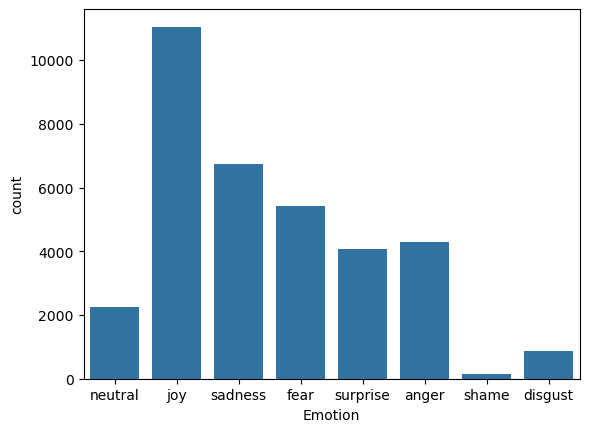

In [11]:
sns.countplot(x='Emotion',data=df)

In [12]:
!pip install neattext
 

In [14]:
import neattext. functions as nfx
#remove the user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [15]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [16]:
#remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [17]:
df

Emotion                                               Text  \
0       neutral                                             Why ?    
1           joy    Sage Act upgrade on my to do list for tommorow.   
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           joy   Such an eye ! The true hazel eye-and so brill...   
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...         ...                                                ...   
34787  surprise  @MichelGW have you gift! Hope you like it! It'...   
34788       joy  The world didnt give it to me..so the world MO...   
34789     anger                           A man robbed me today .    
34790      fear  Youu call it JEALOUSY, I call it of #Losing YO...   
34791   sadness  I think about you baby, and I dream about you ...   

                                              Clean_Text  
0                                                      ?  
1                        Sage Act upgrade list tommorow.  
2      WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...  
3      eye ! true hazel eye-and brilliant ! Regular f...  
4      ugh babe.. hugggzzz u .! babe naamazed nga ako...  
...                                                  ...  
34787    gift! Hope like it! hand wear ! It'll warm! Lol  
34788    world didnt me..so world DEFINITELY cnt away!!!  
34789                                 man robbed today .  
34790                      Youu JEALOUSY, #Losing YOU...  
34791                             think baby, dream time  

[34792 rows x 3 columns]

Spitting data into input variables and target variable
X: features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.
y:Labels are the output or the target variable


In [31]:
x=df['Clean_Text']
y=df['Emotion']

spitting data into train and test set
we need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model's knowledge capability


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



Training the model


In [20]:
!pip install sklearn

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [21]:
!pip install scikit-learn

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6201379574631155

In [39]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc',SVC(kernel='rbf',C=10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.6218624257520597

In [40]:
pipe_rf=Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)


0.5593983521747461

Saving the model

In [41]:
import  joblib
pipeline_file=open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()